In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('pregnancy_gender_myth_dataset.csv')
df1.shape

(5000, 11)

In [3]:
df1.head(5)

,Mother_Age,Pregnancy_Month,Delivery_Week,Baby_Weight,Mother_Health_Score,Diet_Type,Stress_Level,Exercise_Frequency,Work_Hours_Per_Week,Sleep_Hours_Per_Day,Gender
0,24,10,36,3.31,1,Vegetarian,10,Sometimes,46,5.0,Boy
1,37,10,38,3.21,2,Mixed,4,Sometimes,55,8.2,Boy
2,32,10,36,2.45,8,Mixed,9,Rarely,59,6.1,Girl
3,28,10,36,2.99,7,Mixed,7,Often,5,5.1,Girl
4,25,10,37,2.51,5,Mixed,6,Sometimes,45,6.7,Boy


In [4]:
# checking is there any null values present or not
df1.isnull().sum()

Mother_Age             0
Pregnancy_Month        0
Delivery_Week          0
Baby_Weight            0
Mother_Health_Score    0
Diet_Type              0
Stress_Level           0
Exercise_Frequency     0
Work_Hours_Per_Week    0
Sleep_Hours_Per_Day    0
Gender                 0
dtype: int64

In [5]:
# keeping all medically important columns and drop rest of them
# creating new dataframe for important features
df2 = df1.drop(['Baby_Weight', 'Exercise_Frequency', 'Diet_Type', 'Pregnancy_Month'], axis='columns')
df2.shape

(5000, 7)

In [6]:
df2.head()

,Mother_Age,Delivery_Week,Mother_Health_Score,Stress_Level,Work_Hours_Per_Week,Sleep_Hours_Per_Day,Gender
0,24,36,1,10,46,5.0,Boy
1,37,38,2,4,55,8.2,Boy
2,32,36,8,9,59,6.1,Girl
3,28,36,7,7,5,5.1,Girl
4,25,37,5,6,45,6.7,Boy


In [7]:
df2.Gender.unique()

array(['Boy', 'Girl'], dtype=object)

In [8]:
df2.Gender.value_counts()

Gender
Girl    2544
Boy     2456
Name: count, dtype: int64

In [9]:
# one-hat encoding for 'Diet_Type' and 'Gender'
# '0' -> Boy and '1' -> Girl
df3 = pd.get_dummies(df2, columns=['Gender'], drop_first=True).astype(int)
df3.shape


(5000, 7)

In [10]:
df3.head()

,Mother_Age,Delivery_Week,Mother_Health_Score,Stress_Level,Work_Hours_Per_Week,Sleep_Hours_Per_Day,Gender_Girl
0,24,36,1,10,46,5,0
1,37,38,2,4,55,8,0
2,32,36,8,9,59,6,1
3,28,36,7,7,5,5,1
4,25,37,5,6,45,6,0


In [11]:
# renaming 'Gender_Girl' to Gender
df3.rename(columns={'Gender_Girl': 'Gender'}, inplace=True)

In [12]:
df3.head(3)

,Mother_Age,Delivery_Week,Mother_Health_Score,Stress_Level,Work_Hours_Per_Week,Sleep_Hours_Per_Day,Gender
0,24,36,1,10,46,5,0
1,37,38,2,4,55,8,0
2,32,36,8,9,59,6,1


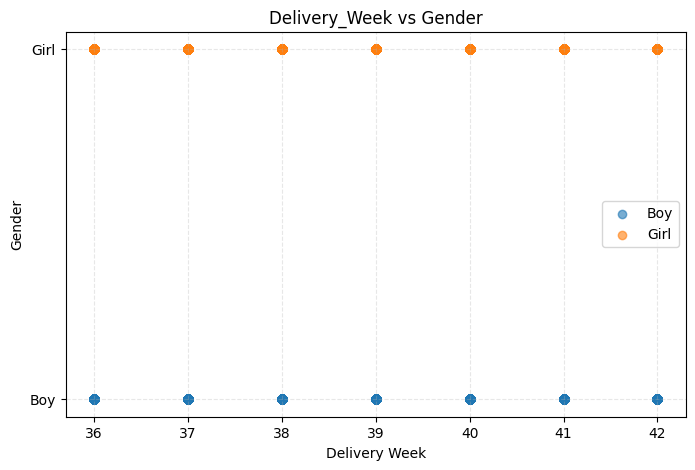

In [13]:
# Delivery_Week vs Gender
import matplotlib.pyplot as plt

# Group data
boys = df3[df3['Gender'] == 0]
girls = df3[df3['Gender'] == 1]

plt.figure(figsize=(8,5))
plt.scatter(boys['Delivery_Week'], boys['Gender'], label='Boy', alpha=0.6)
plt.scatter(girls['Delivery_Week'], girls['Gender'], label='Girl', alpha=0.6)

plt.title('Delivery_Week vs Gender')
plt.xlabel('Delivery Week')
plt.ylabel('Gender')
plt.yticks([0,1], ['Boy','Girl'])

plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()


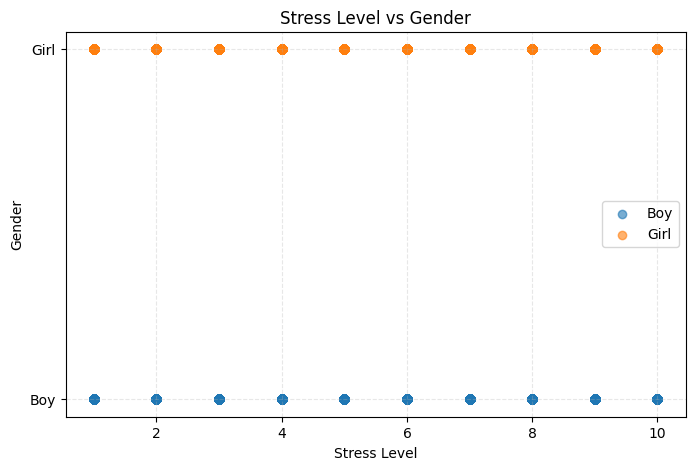

In [14]:
# Stress_Level vs Gender
boys = df3[df3['Gender'] == 0]
girls = df3[df3['Gender'] == 1]

plt.figure(figsize=(8,5))
plt.scatter(boys['Stress_Level'], boys['Gender'], label='Boy', alpha=0.6)
plt.scatter(girls['Stress_Level'], girls['Gender'], label='Girl', alpha=0.6)

plt.title("Stress Level vs Gender")
plt.xlabel("Stress Level")
plt.ylabel("Gender")

plt.yticks([0,1], ['Boy', 'Girl'])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)

plt.show()


In [15]:
df3.Mother_Age.describe()

count    5000.000000
mean       31.005800
std         7.854407
min        18.000000
25%        24.000000
50%        31.000000
75%        38.000000
max        44.000000
Name: Mother_Age, dtype: float64

In [16]:
# it seems there is no outliers in Mother_Age column
# let's still check
# Mathematically with IQR

q1 = df3.Mother_Age.quantile(0.25)
q3 = df3.Mother_Age.quantile(0.75)

IQR = q3 - q1

lower_limit = q1 - 1.5*IQR
upper_limit = q3 + 1.5*IQR

df3[(df3.Mother_Age < lower_limit) | (df3.Mother_Age > upper_limit)]

,Mother_Age,Delivery_Week,Mother_Health_Score,Stress_Level,Work_Hours_Per_Week,Sleep_Hours_Per_Day,Gender


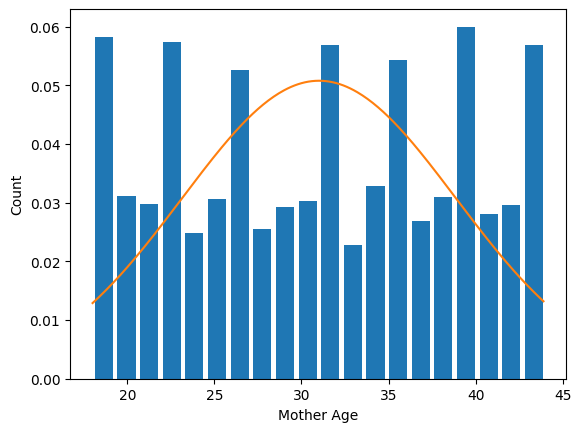

In [17]:
# Plot bell curve along with histogram for our dataset
from scipy.stats import norm
import numpy as np

plt.hist(df3.Mother_Age, bins=20, rwidth=0.8, density=True)
plt.xlabel('Mother Age')
plt.ylabel('Count')

rng = np.arange(df3.Mother_Age.min(), df3.Mother_Age.max(), 0.1)

plt.plot(rng, norm.pdf(rng, df3.Mother_Age.mean(), df3.Mother_Age.std()))

Building model

In [18]:
X = df3.drop('Gender', axis='columns')
X.head(3)

,Mother_Age,Delivery_Week,Mother_Health_Score,Stress_Level,Work_Hours_Per_Week,Sleep_Hours_Per_Day
0,24,36,1,10,46,5
1,37,38,2,4,55,8
2,32,36,8,9,59,6


In [19]:
y = df3.Gender
y.head(3)

0    0
1    0
2    1
Name: Gender, dtype: int32

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit on training data only
scaler.fit(X_train)

# transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [38]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train_scaled, y_train)

model.score(X_test_scaled, y_test)

0.522

In [44]:
# Use K Fold cross validation to measure accuracy of our Logistic Regression model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LogisticRegression(max_iter=1000), X_test_scaled, y_test, cv=cv)


array([0.575, 0.495, 0.505, 0.535, 0.535])

In [45]:
# Find best model using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

def find_best_model_using_gridsearchcv(X ,y):
    algos = {
        'Logistic_regression': {
            'model': LogisticRegression(),
            'params': {}
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion': ['gini', 'entropy'],
                'splitter': ['best', 'random'],
                'max_depth': [None, 5, 10]  
            }
        },
        'Randome_forest': {
            'model': RandomForestClassifier(n_estimators=100),
            'params': {}
        },
        'KNN': {
            'model': KNeighborsClassifier(n_neighbors=10, algorithm='kd_tree'),
            'params': {}
        },
        'SVM': {
            'model': SVC(kernel='sigmoid', gamma='auto'),
            'params': {}
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)

        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X, y)

,model,best_score,best_params
0,Logistic_regression,0.5140,{}
1,decision_tree,0.5094,"{'criterion': 'gini', 'max_depth': 10, 'splitt..."
2,Randome_forest,0.5066,{}
3,KNN,0.5078,{}
4,SVM,0.4974,{}


In [46]:
# Test the model for few properties
import numpy as np

def predict_gender_myth(model, mother_age, delivery_week, health_score, stress_level, work_hours, sleep_hours, scaler=None):
    
    # Create empty feature array
    x = np.zeros(6)  
    
    # Assign values in order
    x[0] = mother_age
    x[1] = delivery_week
    x[2] = health_score
    x[3] = stress_level
    x[4] = work_hours
    x[5] = sleep_hours

    # Apply scaling if used
    if scaler:
        x = scaler.transform([x])[0]

    # Get prediction
    prediction = model.predict([x])[0]
    
    return "Girl" if prediction == 1 else "Boy"


In [51]:
predict_gender_myth(model, 35, 32, 7, 4, 40, 10)

'Boy'

In [53]:
predict_gender_myth(model, 35, 33, 7, 4, 25, 5)

'Girl'

In [54]:
import joblib

joblib.dump(model, 'gender_prediction_myth_burster')

['gender_prediction_myth_burster']

In [55]:
# Export location and column information to a file that will be useful later on in our prediction application
import json

columns = {
    'data_columns': [col.lower() for col in X.columns]
}

with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))